Contains hands-on code using scikit-learn’s LinearRegression to fit a model with multiple features predicting a continuous target.

Shows dataset loading, splitting into train/test sets, model fitting, prediction, and evaluation (e.g., metrics, coefficients).

In [8]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [10]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [11]:
df.shape

(100, 3)

In [12]:
df.head()

,feature1,feature2,target
0,-0.098922,-1.085201,-12.800236
1,-0.264464,-0.491101,-70.714334
2,0.530637,1.002568,74.273726
3,0.768168,1.402303,198.254536
4,-0.780849,0.394535,55.058810


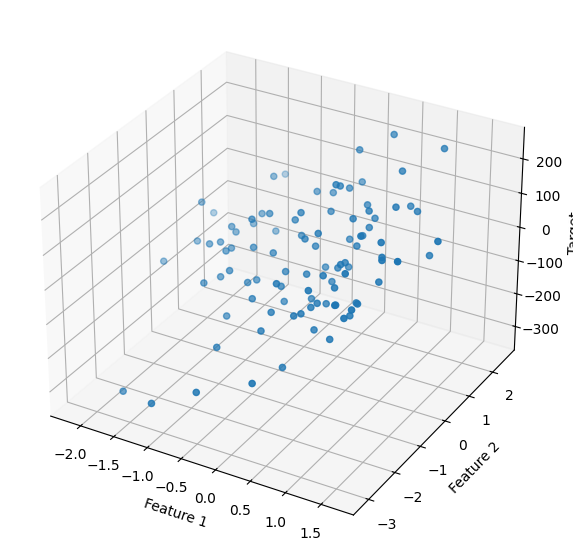

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature1'], df['feature2'], df['target'])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()

Demonstrates building multiple linear regression from scratch, manually computing hypothesis, cost, and updating weights for multiple features.

Teaches the underlying math (matrix or gradient descent steps) and visualizes how the model learns with more than one predictor.

In [14]:
import numpy as np
from sklearn.datasets import load_diabetes

In [15]:
X,y = load_diabetes(return_X_y=True)

In [16]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [17]:
X.shape

(442, 10)

In [18]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [19]:
y.shape

(442,)

Using Sklearn's Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test,y_pred)

0.4399338661568968

In [29]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [30]:
reg.intercept_

np.float64(151.88331005254167)

Making our own Linear Regression Class

In [31]:
class CustomLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        
    

In [32]:
lr = CustomLR()
lr.fit(X_train,y_train)

In [33]:
X_train.shape

(353, 10)

In [34]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [35]:
y_pred = lr.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

0.43993386615689756

In [37]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [38]:
lr.intercept_

np.float64(151.8833100525417)